<a href="https://colab.research.google.com/github/subodhsd/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_final_by_Subodh_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### The Features of The Dataset:



1. UserName-Encoded user name of the user.
2. ScreenName-Encoded version of the name displayed on the user screen.
2. Location-The location of the tweet.
3. Tweet At-Date of the tweet.
4. Original Tweet-The text/content of the tweet.
5. Sentiment-The sentiment of the tweet. It has five labels-Positive, Negative,  Neutral, Extremely Positive, Extremely Negative.

In [ ]:
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization and graphical plotting
import numpy as np # for manipulation of multi-dimensional arrays and matrices
import seaborn as sns # for data visualization
import re # for regular expression matching operations 
import nltk # for Natural Language processing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split #sklearn-- for machine learning algorithms
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score
from wordcloud import WordCloud # to generate word cloud
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#loading the dataset
tweet_df=pd.read_csv('/content/drive/MyDrive/dat files in ml/capstone project/Data & Resources/Coronavirus Tweets.csv',encoding = 'latin')

In [ ]:
#Top five observation of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Information about different column of the Dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
columns=['Location','TweetAt','Sentiment']

In [ ]:
#unique value counts for above mentioned columns
for item in columns:
  value_count=tweet_df[item].value_counts().reset_index().rename(columns={'index': 'Unique Values', 'Location': 'Count'})
  print(f'\033[1mThe number of uniue values in {item} are\033 :\n\n {value_count}\n')



The number of uniue values in Location are :

                       Unique Values  Count
0                            London    540
1                     United States    528
2                   London, England    520
3                      New York, NY    395
4                    Washington, DC    373
...                             ...    ...
12215       Staffordshire Moorlands      1
12216                 Kithchener ON      1
12217                     Tulsa, Ok      1
12218  Watford, South Oxhey, Bushey      1
12219  i love you so much || he/him      1

[12220 rows x 2 columns]

The number of uniue values in TweetAt are :

    Unique Values  TweetAt
0     20-03-2020     3448
1     19-03-2020     3215
2     25-03-2020     2979
3     18-03-2020     2742
4     21-03-2020     2653
5     22-03-2020     2114
6     23-03-2020     2062
7     17-03-2020     1977
8     08-04-2020     1881
9     07-04-2020     1843
10    06-04-2020     1742
11    24-03-2020     1480
12    09-04-2020     147

##Let's deep dive into the tweets

In [ ]:
#Positive Tweets
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Positive']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Positive']['OriginalTweet'].tail(5))

1    advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order                                                                                    
2    Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P                                                                                                                                                                                              
3    My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
5    As news of the

In [ ]:
#Negative Tweets
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Negative']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Negative']['OriginalTweet'].tail(5))

9     For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona                            
24    @10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer                                        
26    In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn                                                                                             
28    Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker P

In [ ]:
#Neutral Tweets
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Neutral']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Neutral']['OriginalTweet'].tail(5))

0     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8                                                                                                                                                                     
7     Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ                                                                                                                                                       
10    All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9
16    ????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ????

In [ ]:
#Extremely Positive
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Extremely Positive']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Extremely Positive']['OriginalTweet'].tail(5))

11    Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.                                                         
12    #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh                       
18    Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a statement. ÂToday this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3         
22    We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help yo

In [ ]:
#Extremely negative
pd.set_option('display.max_colwidth', -1)
print(tweet_df[tweet_df['Sentiment']=='Extremely Negative']['OriginalTweet'].head(5))
print(tweet_df[tweet_df['Sentiment']=='Extremely Negative']['OriginalTweet'].tail(5))

4     Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n
20    with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale                                                                       
27    This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂm doing ???? No panic. https://t.co/Lg7HVMZglZ                                          
29    @7Seals

In [ ]:
#create new column for number of characters which stores length of each tweet
tweet_df['number of characters']=tweet_df['OriginalTweet'].apply(lambda x: len(x))

In [ ]:
#maximum character count of tweet
count_max=tweet_df['number of characters'].max()
count_max

355

In [ ]:
#tweet with maximum number of character
tweet_df.loc[25160,:]

UserName                28959                                                                                                                                                                                                                                                                                                                                                                                               
ScreenName              73911                                                                                                                                                                                                                                                                                                                                                                                               
Location                Melbourne, Australia                                                                                                                                  

In [ ]:
#minimun character count of tweet
count_min=tweet_df['number of characters'].min()
count_min

11

In [ ]:
#tweet with number of minumum character
pd.set_option('display.max_colwidth', -1)  
tweet_df[tweet_df['number of characters']==count_min]['OriginalTweet']

9776     Be like Bob
16872    Cartoon for
20467    Omg y all  
35526          amp  
Name: OriginalTweet, dtype: object

In [ ]:
tweet_df.loc[9776,:],tweet_df.loc[16872,:],tweet_df.loc[20467,:],tweet_df.loc[35526,:]

(UserName                13575                   
 ScreenName              58527                   
 Location                Scotland, United Kingdom
 TweetAt                 20-03-2020              
 OriginalTweet           Be like Bob             
 Sentiment               Positive                
 number of characters    11                      
 Name: 9776, dtype: object, UserName                20671      
 ScreenName              65623      
 Location                ?? ?       
 TweetAt                 23-03-2020 
 OriginalTweet           Cartoon for
 Sentiment               Neutral    
 number of characters    11         
 Name: 16872, dtype: object, UserName                24266          
 ScreenName              69218          
 Location                Coastal Elite ?
 TweetAt                 25-03-2020     
 OriginalTweet           Omg y all      
 Sentiment               Neutral        
 number of characters    11             
 Name: 20467, dtype: object, UserName            

In [ ]:
#describtion of character length column
tweet_df['number of characters'].describe()

count    41157.000000
mean     204.200160  
std      68.655129   
min      11.000000   
25%      151.000000  
50%      215.000000  
75%      259.000000  
max      355.000000  
Name: number of characters, dtype: float64

## Check Null values

In [ ]:
#null values of each column
tweet_df.isnull().sum()

UserName                0   
ScreenName              0   
Location                8590
TweetAt                 0   
OriginalTweet           0   
Sentiment               0   
number of characters    0   
dtype: int64

##Top 20 location with highest number of tweets

In [ ]:
tweet_location=tweet_df['Location'].value_counts().reset_index().rename(columns = {'index':'Location','Location':'Number_of_Tweets'})

In [ ]:
tweet_location=tweet_location.sort_values(by='Number_of_Tweets',ascending=False).head(20)
tweet_location

,Location,Number_of_Tweets
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


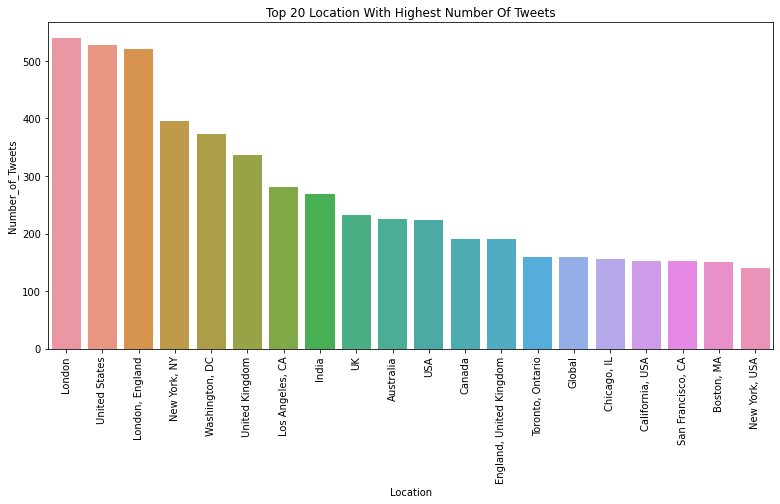

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(data=tweet_location, x="Location",y="Number_of_Tweets");
plt.xticks(rotation=90);
plt.title('Top 20 Location With Highest Number Of Tweets'); 

### Observation






*   Graph shows top 20 locations with highest of tweets.London is the city with highest number of tweets.



## Top 20 Date With Highest Number Of Tweets

In [ ]:
#top 20 date with highest number of tweets
tweet_date=tweet_df['TweetAt'].value_counts().reset_index().rename(columns = {'index':'Date_Of_Tweet','TweetAt':'Number_of_Tweets'})
tweet_date=tweet_date.sort_values(by='Number_of_Tweets',ascending=False).head(20)


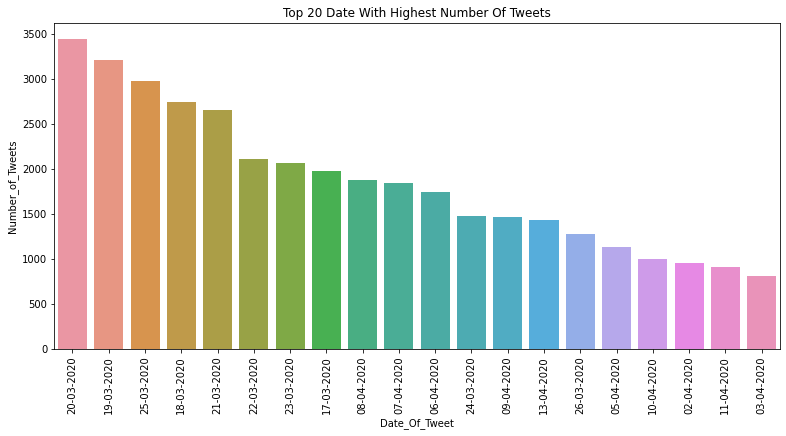

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(data=tweet_date, x="Date_Of_Tweet",y="Number_of_Tweets");
plt.xticks(rotation=90);
plt.title('Top 20 Date With Highest Number Of Tweets');

### Observation


*   Graph shows top 20 date with highest of tweets. 20th march 2020 witnessed highest number of tweets.

## Tweet distribution in terms of sentiment

In [ ]:
tweet_sentiment=tweet_df['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Number_of_Tweets'})
tweet_sentiment=tweet_sentiment.sort_values(by='Number_of_Tweets',ascending=False)

In [ ]:
tweet_sentiment

,Sentiment,Number_of_Tweets
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


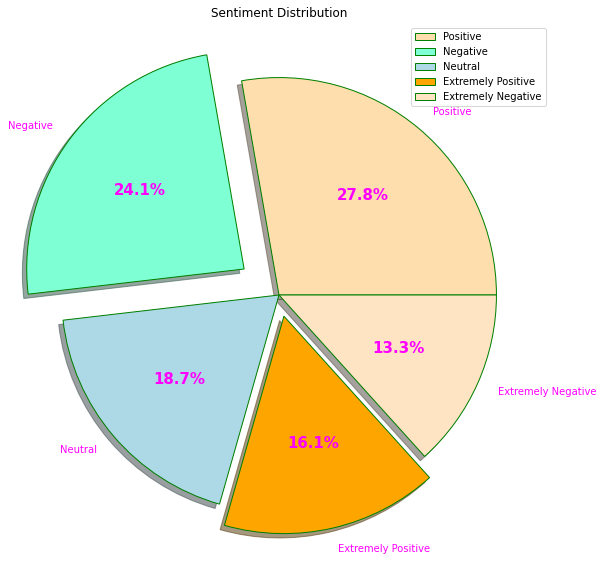

In [ ]:
#pie chart for percentage distribution of sentiment of tweets
explode = (0, 0.2, 0,0.1,0)
labels = 'Positive', 'Negative', 'Neutral','Extremely Positive','Extremely Negative'
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts=ax.pie(data=tweet_sentiment,x='Number_of_Tweets',labels=labels,autopct='%1.1f%%',shadow=True,explode=explode,colors=['navajowhite','aquamarine','lightblue','orange','bisque'],wedgeprops = wp,textprops = dict(color ="magenta"))
plt.setp(autotexts, size = 15, weight ="bold")
plt.legend( loc=1)
ax.set_title("Sentiment Distribution");

### Observation


*   Pie chart for percentage distribution of sentiment of tweets. Positive sentiment tweets have the largest share.



# HashTag Analysis

In [ ]:
# function for hashtags collection 
def hashtag(x):
    ''' This function collects all
      the hashtags from the tweets '''
    
    hashtags_list = []
    
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        for item in ht:
          hashtags_list.append(item)
    
    return hashtags_list

In [ ]:
total_hashtags=hashtag(tweet_df['OriginalTweet'])

In [ ]:
total_hashtags_df=pd.DataFrame({"Hashtags":total_hashtags})
total_hashtags_df

,Hashtags
0,COVID19france
1,COVID_19
2,COVID19
3,coronavirus
4,confinement
...,...
81146,coronavirus
81147,toiletpaper
81148,coronavirus
81149,COVID19


In [ ]:
#number of total hashtags
len(total_hashtags_df)

81151

In [ ]:
#unique hash tags
total_hashtags_df.nunique()


Hashtags    18367
dtype: int64

In [ ]:
#printing all unique hashtags
with np.printoptions(threshold=np.inf):
    print(total_hashtags_df['Hashtags'].unique())

['COVID19france' 'COVID_19' 'COVID19' 'coronavirus' 'confinement'
 'Confinementotal' 'ConfinementGeneral' 'CoronavirusFrance'
 'restezchezvous' 'StayAtHome' 'Covid_19' 'Rebel' 'toiletpapercrisis'
 'covid_19' 'govindia' 'IndiaFightsCorona' 'manila' 'lockdown' 'covid2019'
 'Philippines' 'horningsea' 'CoronaVirus' 'covid19' 'COVID2019' 'Trials'
 'Monthly' 'Yearly' 'Prices' 'Subscriptions' 'bestiptv' 'iptv' 'Service'
 'Iptv' 'iptvdeals' 'Cheap' 'ipTV' 'Football' 'HD' 'Movies' 'Adult'
 'Cinema' 'hotmovies' 'iptvnew' 'iptv2020' 'ipTv' '18Movies' 'consumer'
 'tracker' 'CovidNYC' 'Coronavirus' 'StockUp' 'BreakingNews' 'Breaking'
 'CoronavirusOutbreak' 'COVID' 'Collapse' 'BrickAndMortar' 'jlmco'
 'jlmcobrand' 'coronapocolypse' 'shoponline' 'economy' 'onlineshopping'
 'stayhome' 'houston' 'nofood' 'Notoiletpaper' 'NoHandShakes'
 'nohandsanitizer' 'pandemic' 'totallockdown' 'COVID2019usa' 'walmart'
 'QuarantineLife' 'IMadeThisUp' 'FakeNews' 'CoronaVirusSA'
 'peoplearelosingtheirminds' 'StopTheMad

In [ ]:
#top 50 hashtags
top_hashtags=total_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,12954
1,COVID19,3364
2,Covid_19,2589
3,Coronavirus,2333
4,COVID2019,1634
5,toiletpaper,1410
6,COVID,1284
7,covid19,1127
8,CoronaCrisis,734
9,CoronaVirus,645


Text(0.5, 1.0, 'Top 50 hashtags')

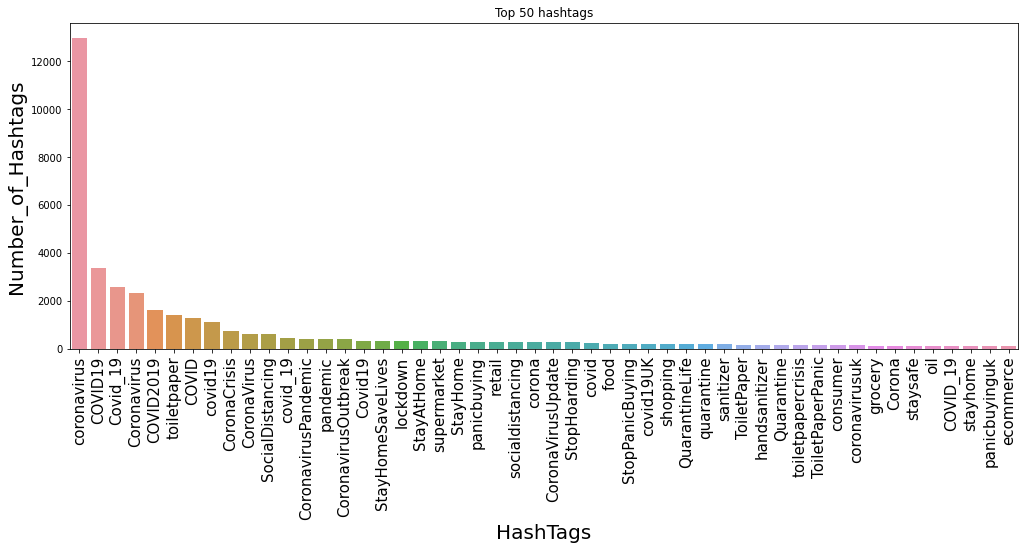

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 hashtags")

### Observation


1.   Graph shows top 50 hashtags. coronavirus is the top hashtags with a count of 12954.



### Positive Hashtags

In [ ]:
positive_hashtags=hashtag(tweet_df[tweet_df['Sentiment']=='Positive']['OriginalTweet'])

In [ ]:
positive_hashtags_df=pd.DataFrame({"Hashtags":positive_hashtags})
positive_hashtags_df

,Hashtags
0,COVID19france
1,COVID_19
2,COVID19
3,coronavirus
4,confinement
...,...
22050,coronavirus
22051,StayHome
22052,SocialDistancing
22053,coronavirus


In [ ]:
#number of total hashtags
len(positive_hashtags_df)

22055

In [ ]:
#unique positive hash tags
positive_hashtags_df.nunique()


Hashtags    6772
dtype: int64

In [ ]:
#printing all unique positive hashtags
with np.printoptions(threshold=np.inf):
    print(positive_hashtags_df['Hashtags'].unique())

['COVID19france' 'COVID_19' 'COVID19' 'coronavirus' 'confinement'
 'Confinementotal' 'ConfinementGeneral' 'Covid_19' 'CoronaVirus' 'covid19'
 'CoronavirusOutbreak' 'COVID2019' 'economy' 'onlineshopping' 'stayhome'
 'coronapocolypse' 'LockdownCanada' 'Coronavirus' 'ecommerce'
 'omnichannel' 'retail' 'digital' 'StayHealthy' 'pricegougers' 'Hoarders'
 'Idiots' 'panicbuying' 'selfishpeople' 'COVID' 'groceries'
 'panicshopping' 'StopPanicBuying' 'StaySafe' 'frontlines' 'WINWIN'
 'stayindoorsandshop' 'reverselogistics' 'ECommerce' 'Returns'
 'panicbuyers' 'SocialDistancing' 'coronavir' 'covid' 'mandrilltoys'
 'coronavirusuk' 'shopping' 'socialdistance' 'socialising' 'uk' 'StayHome'
 'DTC' 'stores' 'stopPanicBuying' 'zakat' 'Amazon' 'cannabisindustry'
 'news965' 'wdbo' 'supermarkets' 'food' 'Apple' 'AppleStore' 'health'
 'closing' 'quarantine' 'China' 'GreaterChina' 'OWHealth' 'OWCovid19'
 'Makro' 'SelfQuarantine' 'StopHoarding' 'StayAtHome' 'CoronaVirusUpdates'
 'ignoranthumans' 'Milwaukee' 

In [ ]:
#top 50 positive hashtags
top_50_positive_hashtags=positive_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_50_positive_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,3569
1,COVID19,975
2,Covid_19,694
3,Coronavirus,629
4,COVID2019,466
5,toiletpaper,387
6,covid19,348
7,COVID,343
8,SocialDistancing,183
9,CoronaCrisis,158


Text(0.5, 1.0, 'Top 50 positive hashtags')

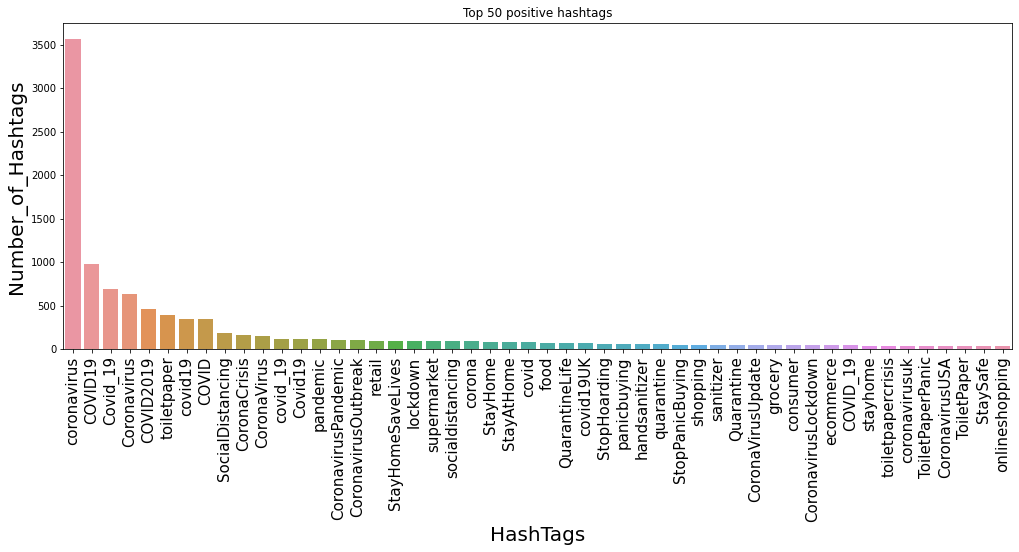

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_50_positive_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 positive hashtags")

### Observation


1.   Graph shows top 50 positive hashtags. coronavirus is the top hashtags with a count of 3569.

### Negative Hashtags

In [ ]:
negative_hashtags=hashtag(tweet_df[tweet_df['Sentiment']=='Negative']['OriginalTweet'])

In [ ]:
negative_hashtags_df=pd.DataFrame({"Hashtags":negative_hashtags})
negative_hashtags_df

,Hashtags
0,govindia
1,IndiaFightsCorona
2,COVID19
3,CovidNYC
4,CoronaVirusSA
...,...
18167,COVID19
18168,coronavirus
18169,toiletpaper
18170,Toronto


In [ ]:
#total number of negative hashtags
len(negative_hashtags_df)

18172

In [ ]:
#unique negative hash tags
negative_hashtags_df.nunique()

Hashtags    5601
dtype: int64

In [ ]:
#printing all unique negative hashtags
with np.printoptions(threshold=np.inf):
    print(negative_hashtags_df['Hashtags'].unique())

['govindia' 'IndiaFightsCorona' 'COVID19' 'CovidNYC' 'CoronaVirusSA'
 'Covid_19' 'coronavirus' 'Scammers' 'COVID' 'cdc' 'flu' 'trends' 'alert'
 'nameandshame' 'covid' 'Liverpool' 'services' 'food' 'delivery'
 'COVID19Aus' 'DontPanicBuy' 'coronapocolypse' 'panicbuying'
 'whatashitshow' 'stoppanickbuying' 'thinkingofothers' 'panicshopping'
 'pricegougers' 'Idiots' 'unpopularopinion' 'COVID2019' 'Malaysia2020'
 'pricegouging' 'KenyanTraffic' 'scrubs' 'covid19' 'Medtwitter' 'Kashmir'
 'CoronavirusOutbreak' 'KashmirLockdown' 'Kashmiris' 'nationalquarantine'
 'Coronavirus' 'panic' 'buying' 'groceries' 'manchestereveningnose'
 'saffronflapjack' 'panicforage' 'panicforaging' 'FashionÂ' 'Travel'
 'stockmarkets' 'economic' 'governments' 'businesses' 'retail' 'apparel'
 'socialdistancing' 'store' 'closures' 'revenues' 'Ulta' 'brickandmortar'
 'cosmetics' 'pandemic' 'COVID_19uk' 'shopping' 'COVID_19' 'MnA'
 'CoronaVirus' 'CONVID19' 'jobs' 'hiring' 'Europe' 'QuarantineLife'
 'Oliverscampaign' 'ener

In [ ]:
#top 50 negative hashtags
top_50_negative_hashtags=negative_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_50_negative_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,3041
1,COVID19,725
2,Covid_19,661
3,Coronavirus,581
4,COVID2019,398
5,COVID,300
6,toiletpaper,271
7,covid19,205
8,CoronaCrisis,195
9,CoronaVirus,150


Text(0.5, 1.0, 'Top 50 negative hashtags')

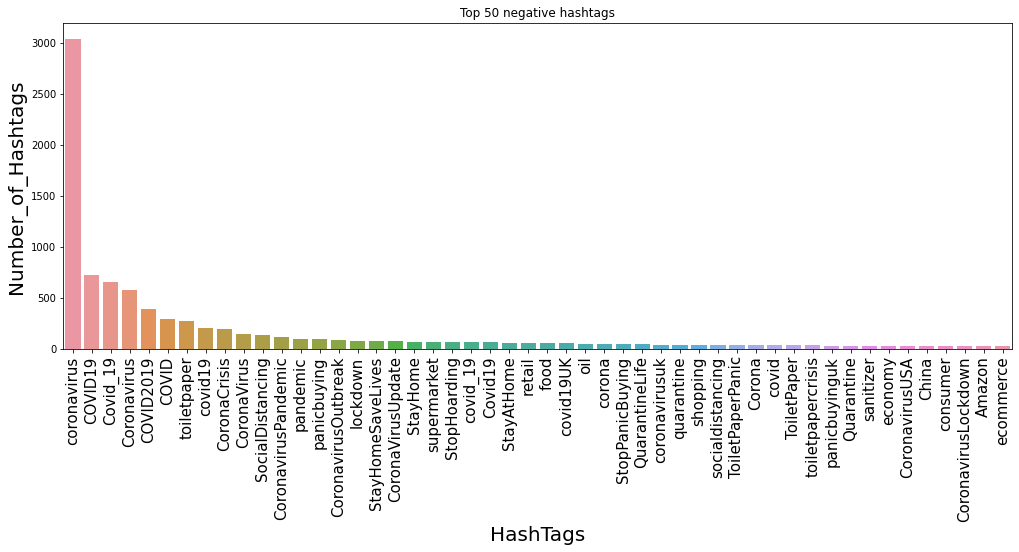

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_50_negative_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 negative hashtags")

### Observation


1.   Graph shows top 50 negative hashtags. coronavirus is the top hashtags with a count of 3041.

### Neutral Hashtags

In [ ]:
neutral_hashtags=hashtag(tweet_df[tweet_df['Sentiment']=='Neutral']['OriginalTweet'])

In [ ]:
neutral_hashtags_df=pd.DataFrame({"Hashtags":neutral_hashtags})
neutral_hashtags_df

,Hashtags
0,Rebel
1,toiletpapercrisis
2,covid_19
3,manila
4,lockdown
...,...
19674,NZ
19675,COVID
19676,coronavirus
19677,COVID19


In [ ]:
#total number of neutral hashtags
len(neutral_hashtags_df)

19679

In [ ]:
#unique neutral hash tags
neutral_hashtags_df.nunique()

Hashtags    6502
dtype: int64

In [ ]:
#printing unique neutral hashtags
with np.printoptions(threshold=np.inf):
    print(neutral_hashtags_df['Hashtags'].unique())

['Rebel' 'toiletpapercrisis' 'covid_19' 'manila' 'lockdown' 'covid2019'
 'Philippines' 'coronavirus' 'BrickAndMortar' 'COVID2019' 'QuarantineLife'
 'CoronavirusOutbreak' 'IMadeThisUp' 'FakeNews' 'pandemic'
 'socialdistancing' 'retail' 'seafood' 'CoronavirusReachesDelhi'
 'Coronavid19' 'CoronaVirusUpdates' 'COVID19' 'JhalakBollywood'
 'JhalakKollywood' 'JhalakTollywood' 'TrumpIsAnIdiot' 'trumpneedstoshutup'
 'Priorities' 'CoronaVirus' 'retailapocalypse2020' 'retailnews'
 'Coronavirus' 'LOTL' 'boomers' 'SocialDista' 'Dallas' 'coronapocolypse'
 'immunesystem' 'immunesupport' 'Food' 'foodshortage' 'foodsecurity'
 'Stockpile' 'Canada' 'Meat' 'hoarding' 'nomestleft' 'nofood' 'canada'
 'panic' 'panicshopping' 'RetailWorkers' 'coronavirusinpakistan'
 'satispay' 'DigitalMarketing' 'letspanic' 'Q22' 'covid19'
 'COVID19ireland' 'igetit' 'StayTheFHome' 'SocialDistancing'
 'SelfIsolation' 'StopTheSpread' 'StopPanicBuying' 'covid' 'CoronaVirusSA'
 'Covid_19' 'foodsafety' 'CoronavirusPandemic' 'super

In [ ]:
#top 50 neutral hashtags
top_50_neutral_hashtags=neutral_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_50_neutral_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,2714
1,COVID19,740
2,Coronavirus,520
3,toiletpaper,465
4,Covid_19,462
5,COVID,301
6,covid19,296
7,COVID2019,293
8,SocialDistancing,154
9,covid_19,151


Text(0.5, 1.0, 'Top 50 neutral hashtags')

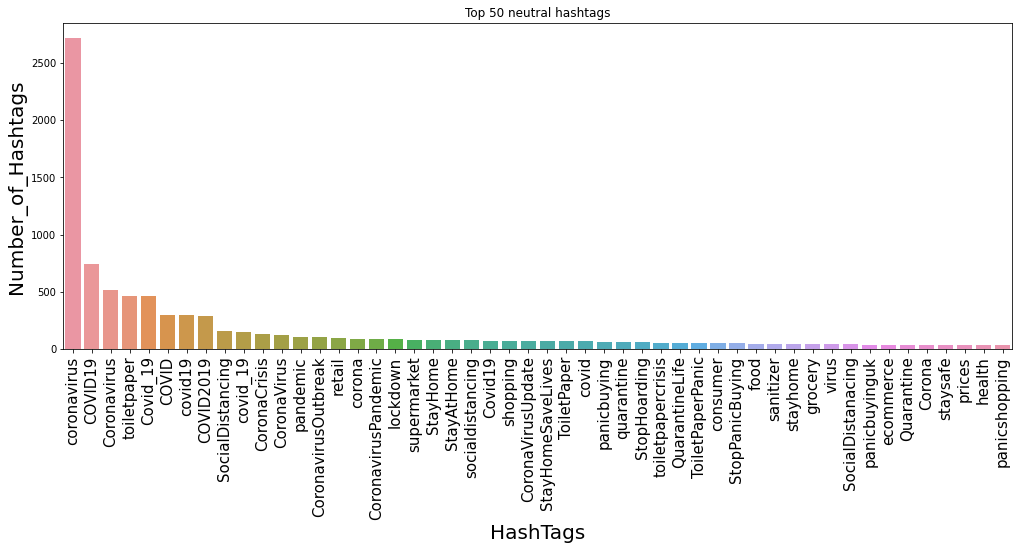

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_50_neutral_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 neutral hashtags")

### Observation


1.   Graph shows top 50 neutral hashtags. coronavirus is the top hashtags with a count of 2714.

### Extremely Positive Hashtags

In [ ]:
extremely_positive_hashtags=hashtag(tweet_df[tweet_df['Sentiment']=='Extremely Positive']['OriginalTweet'])

In [ ]:
extremely_positive_hashtags_df=pd.DataFrame({"Hashtags":extremely_positive_hashtags})
extremely_positive_hashtags_df

,Hashtags
0,horningsea
1,COVID2019
2,Trials
3,Monthly
4,Yearly
...,...
12531,sanitizers
12532,corona
12533,coronavirus
12534,coronavÃ


In [ ]:
#total number of extremely positive hashtags
len(extremely_positive_hashtags_df)

12536

In [ ]:
#unique extremely positive hashtags
extremely_positive_hashtags_df.nunique()

Hashtags    4425
dtype: int64

In [ ]:
#printing unique extremely positive hashtags
with np.printoptions(threshold=np.inf):
    print(extremely_positive_hashtags_df['Hashtags'].unique())

['horningsea' 'COVID2019' 'Trials' 'Monthly' 'Yearly' 'Prices'
 'Subscriptions' 'bestiptv' 'iptv' 'Service' 'Iptv' 'iptvdeals' 'Cheap'
 'ipTV' 'Football' 'HD' 'Movies' 'Adult' 'Cinema' 'hotmovies' 'iptvnew'
 'iptv2020' 'ipTv' '18Movies' 'consumer' 'covid19' 'tracker'
 'BreakingNews' 'Breaking' 'Coronavirus' 'CoronavirusOutbreak' 'COVID19'
 'COVID' 'COVID_19' 'Collapse' 'coronavirus' 'jlmco' 'jlmcobrand'
 'coronapocolypse' 'shoponline' 'peoplearelosingtheirminds'
 'StopTheMadness' 'stoppanicbuying' 'StopPanicBuying' 'BeKind' 'mufc'
 'MUFC_Family' 'Malaysia2020' 'Malaysia' 'QuarantineLife' 'Corona'
 'covid_19' 'panic' 'shopping' 'unitedagainstdementia' 'lottery'
 'stockmarket' 'toiletpaper' 'Arizona' 'FoxNews' 'fox10phoenix' 'Covid_19'
 'workinghard' 'safety' 'DedicatedPeople' 'covid2019' 'coronavirusindia'
 'MAbiz' 'CoronavirusPandemic' 'marketresearch' 'consumerinsights'
 'stopthespread' 'socialdistancing' 'Odisha' 'OdishaNews' 'OmmcomNews'
 'ecommerce' 'retail' 'dtc' 'coronapocalypse'

In [ ]:
#top 50 extremely positive hashtags
top_50_extremely_positive_hashtags=extremely_positive_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_50_extremely_positive_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,1978
1,COVID19,543
2,Covid_19,394
3,Coronavirus,315
4,COVID2019,248
5,COVID,196
6,covid19,192
7,toiletpaper,185
8,SocialDistancing,115
9,CoronaCrisis,112


Text(0.5, 1.0, 'Top 50 extremely positive hashtags')

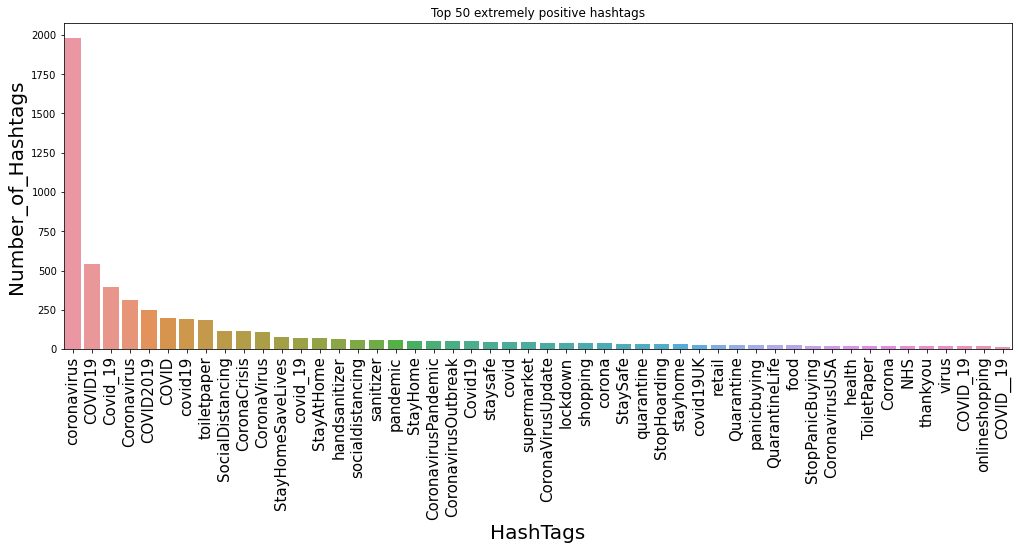

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_50_extremely_positive_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 extremely positive hashtags")

### Observation


1.   Graph shows top 50 extremely positive hashtags. coronavirus is the top hashtags with a count of 1978.

### Extremely Negative Hashtags

In [ ]:
extremely_negative_hashtags=hashtag(tweet_df[tweet_df['Sentiment']=='Extremely Negative']['OriginalTweet'])

In [ ]:
extremely_negative_hashtags_df=pd.DataFrame({"Hashtags":extremely_negative_hashtags})
extremely_negative_hashtags_df

,Hashtags
0,COVID19
1,coronavirus
2,CoronavirusFrance
3,restezchezvous
4,StayAtHome
...,...
8704,funny
8705,Hysterical
8706,UniMelbPursuit
8707,covid19


In [ ]:
#total number of extremely negative hashtags
len(extremely_negative_hashtags_df)

8709

In [ ]:
#unique extremely negative hashtags
extremely_negative_hashtags_df.nunique()

Hashtags    2732
dtype: int64

In [ ]:
#printing all extremely negative unique hashtags
with np.printoptions(threshold=np.inf):
    print(extremely_negative_hashtags_df['Hashtags'].unique())

['COVID19' 'coronavirus' 'CoronavirusFrance' 'restezchezvous' 'StayAtHome'
 'confinement' 'Coronavirus' 'StockUp' 'CoronavirusOutbreak' 'houston'
 'nofood' 'Notoiletpaper' 'NoHandShakes' 'nohandsanitizer' 'pandemic'
 'totallockdown' 'COVID2019usa' 'walmart' 'COVID' 'coronavirusuk'
 'anxiety' 'panicbuyinguk' 'morons' 'COVID2019' 'retail' 'Covid19Walkout'
 'Thread' 'covid' 'Coronavirusupdate' 'Coronapocolypse' 'cct320'
 'toiletpaper' 'coronapocolypse' 'French' 'StayInformed' 'StayConnected'
 'NAILBA2020' 'bread' 'stockup' 'davesbread' 'Yorkshire' 'UK' 'Iran'
 'Italy' 'India' 'Bharat' 'AfricanHistoryClass' 'Covid_19'
 'TaxiDriverShow' 'taxijam' 'blackpot' 'Sta' 'QuarantineLife'
 'panicshopping' 'IHSS' 'SanFrancisco' 'njcoronavirus' 'Quarantine'
 'Elderly' 'Food' 'CoronaVirus' 'StopPanicBuying' 'StopStockpiling'
 'Economics' 'Finance' 'stockpiling' 'Amazon' 'WholeFoods' 'amazonfresh'
 'curfew' 'lockdown' 'hoarding' 'stophoarding' 'covid19' 'helpers'
 'nurses' 'Doctor' 'traderjoes' 'Makro' 

In [ ]:
#top 50 extremely negative hashtags
top_50_extremely_negative_hashtags=extremely_negative_hashtags_df.value_counts().sort_values(ascending=False).reset_index().rename({0:'Number_of_Hashtags'},axis=1).head(50)
top_50_extremely_negative_hashtags

,Hashtags,Number_of_Hashtags
0,coronavirus,1652
1,COVID19,381
2,Covid_19,378
3,Coronavirus,288
4,COVID2019,229
5,COVID,144
6,CoronaCrisis,134
7,CoronaVirus,118
8,toiletpaper,102
9,covid19,86


Text(0.5, 1.0, 'Top 50 extremely negative hashtags')

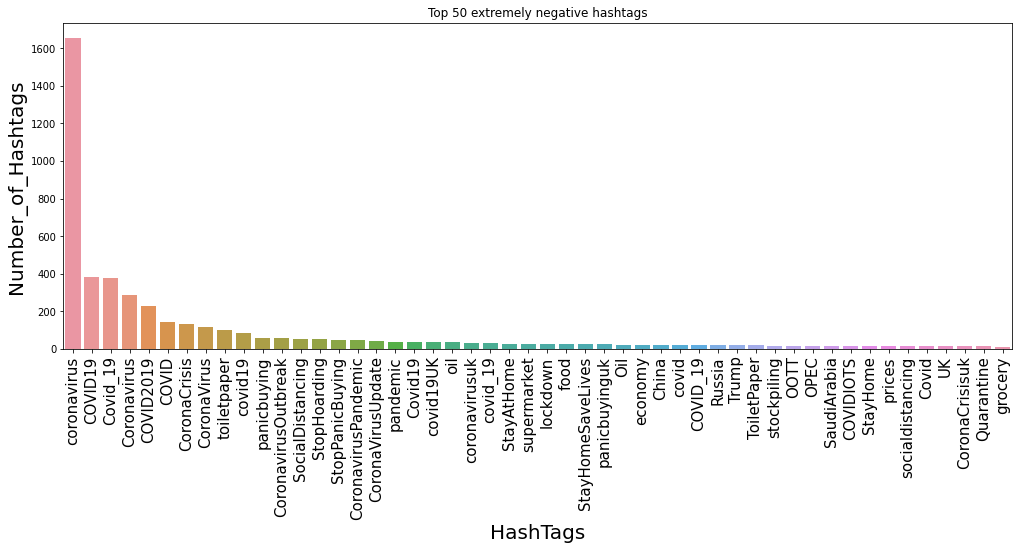

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(data=top_50_extremely_negative_hashtags, x="Hashtags", y="Number_of_Hashtags")
plt.xticks(fontsize=15,rotation=90);
plt.xlabel("HashTags",fontsize=20);
plt.yticks(fontsize=10);
plt.ylabel("Number_of_Hashtags",fontsize=20);
plt.title("Top 50 extremely negative hashtags")

### Observation


1.   Graph shows top 50 extremely positive hashtags. coronavirus is the top hashtags with a count of 1652.

## Data Processing

In [ ]:
#remove urls,user name,punctuations, numbers, and special characters from tweets
def clean_tweet(x):
  '''remove urls,user name,punctuations, 
     numbers, and special 
     characters from tweets'''
     
  r=re.findall('@[\w]*', x)
  for i in r:
    x = re.sub(i,'',x)
  x=re.sub('http://\S+|https://\S+', '', x)
  x=re.sub('[^a-zA-Z]+',' ', x)
  return x

In [ ]:
# creating a variable Clean_Tweet with does not contain urls,user name,punctuations, numbers, and special characters
tweet_df['Clean_Tweet']=tweet_df['OriginalTweet'].apply(lambda x:clean_tweet(x))
tweet_df['Clean_Tweet']

0         and and                                                                                                                                                                                                                                                           
1        advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order                      
2        Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak                                                                                                                                                             
3        My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe COVID france COVID 

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#Tokenization,stop word removal and lemmatization
lemmatizer = WordNetLemmatizer()
def tokenize(x):
  ''' Tokenization, removing stop words 
    and lemmatization'''
  word_tokens = word_tokenize(x)
  x = [lemmatizer.lemmatize(w).lower() for w in word_tokens if not w.lower() in stop_words]
  x=" ".join(x)
  return x


In [ ]:
tweet_df['Clean_Tweet']=tweet_df['Clean_Tweet'].apply(lambda x:tokenize(x))

### Most common words in clean tweets

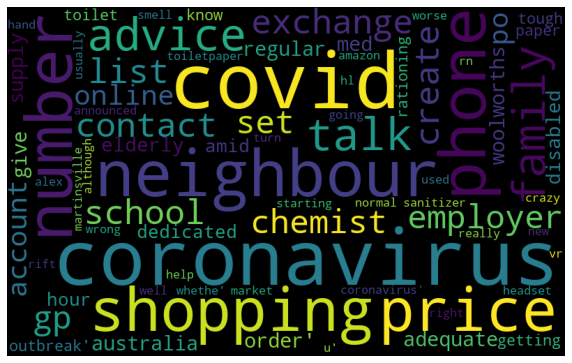

In [ ]:
# Most common words in all the Clean tweets
text = tweet_df['Clean_Tweet'].values 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

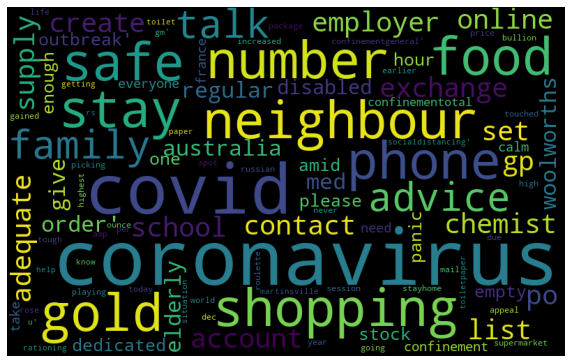

In [ ]:
# Most common words in positive sentiment tweets
text = tweet_df[tweet_df['Sentiment']=='Positive']['Clean_Tweet'].values 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

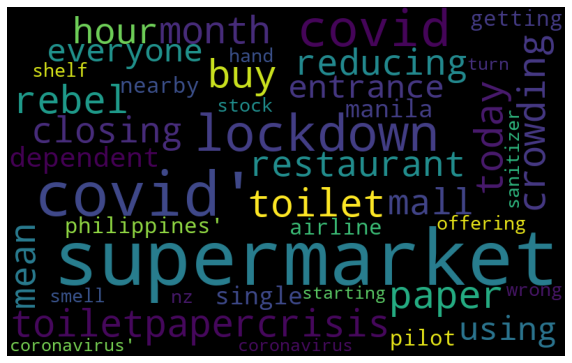

In [ ]:
# Most common words in neutral sentiment tweets
text = tweet_df[tweet_df['Sentiment']=='Neutral']['Clean_Tweet'].values 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

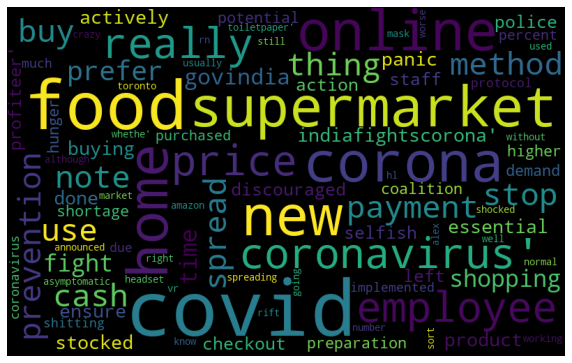

In [ ]:
# Most common words in negative sentiment tweets
text = tweet_df[tweet_df['Sentiment']=='Negative']['Clean_Tweet'].values 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

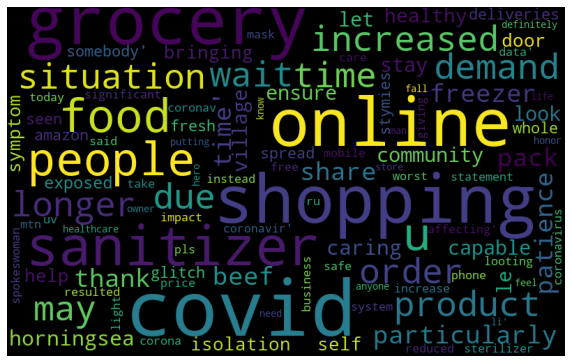

In [ ]:
# Most common words in extremely positive sentiment tweets
text = tweet_df[tweet_df['Sentiment']=='Extremely Positive']['Clean_Tweet'].values 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

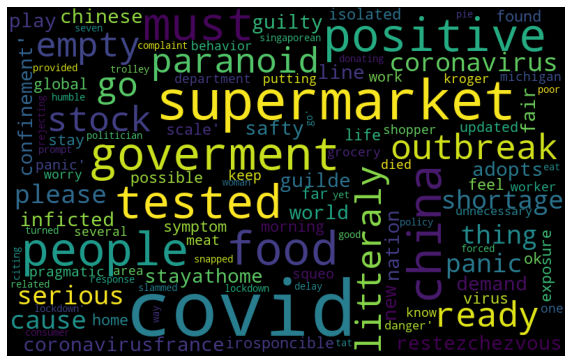

In [ ]:
# Most common words in extremely negative sentiment tweets
text = tweet_df[tweet_df['Sentiment']=='Extremely Negative']['Clean_Tweet'].values 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Feature Extraction

In [ ]:
#Extracting 'Clean_Tweet','Sentiment' features from tweet_df dataset
df=tweet_df[['Clean_Tweet','Sentiment']]

In [ ]:
df.head(10)

,Clean_Tweet,Sentiment
0,,Neutral
1,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order,Positive
2,coronavirus australia woolworths give elderly disabled dedicated shopping hour amid covid outbreak,Positive
3,food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral,Positive
4,ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement,Extremely Negative
5,news region first confirmed covid case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good report,Positive
6,cashier grocery store sharing insight covid prove credibility commented civics class know talking,Positive
7,supermarket today buy toilet paper rebel toiletpapercrisis covid,Neutral
8,due covid retail store classroom atlanta open walk business class next two week beginning monday march continue process online phone order normal thank understanding,Positive
9,corona prevention stop buy thing cash use online payment method corona spread note also prefer online shopping home time fight covid govindia indiafightscorona,Negative


In [ ]:
#checking shape
df.shape

(41157, 2)

In [ ]:
#checking null values
df.isnull().sum()

Clean_Tweet    0
Sentiment      0
dtype: int64

## Splitting the data set into train set and test set 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['Clean_Tweet'],df['Sentiment'],test_size = 0.2,random_state=0,stratify = df.Sentiment.values)

In [ ]:
#checking shape of train and test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32925,), (8232,), (32925,), (8232,))

## Count_vectorizer

In [ ]:
# convert textual data to number matrix using count vectorizer
vectorizer = CountVectorizer(stop_words = stop_words,decode_error = 'replace',max_features=30000)
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)


In [ ]:
# checking shape of converted matrix
X_train_vectorizer.shape,X_test_vectorizer.shape

((32925, 30000), (8232, 30000))

### Tf-Idf

In [ ]:
#convert textual data to number matrix using tf-idf method
vectorizer_tf_idf = TfidfVectorizer(stop_words = stop_words,decode_error = 'replace',max_features=30000)
X_train_tf_idf = vectorizer_tf_idf.fit_transform(X_train)
X_test_tf_idf = vectorizer_tf_idf.transform(X_test)

## Modeling(multiclass classification with count vectorizer)

### Naive Bayes Classifier

In [ ]:
#importing model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
#fitting data on the model
naiveByes_clf.fit(X_train_vectorizer,y_train)

#evaluating the model
Train_prediction=naiveByes_clf.predict(X_train_vectorizer)
Test_prediction = naiveByes_clf.predict(X_test_vectorizer)
Train_accurecy=accuracy_score(y_train,Train_prediction)
Test_accuracy = accuracy_score(y_test,Test_prediction)
print("training accuracy Score    : ",Train_accurecy)
print("Validation accuracy Score : ",Test_accuracy )
print(classification_report(Test_prediction,y_test))

training accuracy Score    :  0.7303264996203492
Validation accuracy Score :  0.4866375121477162
                    precision    recall  f1-score   support

Extremely Negative       0.41      0.58      0.48       784
Extremely Positive       0.43      0.57      0.49       982
          Negative       0.51      0.44      0.48      2303
           Neutral       0.40      0.65      0.49       942
          Positive       0.59      0.42      0.49      3221

          accuracy                           0.49      8232
         macro avg       0.47      0.53      0.49      8232
      weighted avg       0.51      0.49      0.49      8232



### Naive Bayes Classifier(Hyper parameter Tuning)

In [ ]:
parameter_naiv={'alpha':[0.1,0.3,0.5,0.7,0.8,0.9,1.0]}

In [ ]:
#finding best parameter with randomized search CV
clf_naiv = RandomizedSearchCV(naiveByes_clf, parameter_naiv,cv=5)
clf_naiv.fit(X_train_vectorizer,y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9,
                                                  1.0]})

In [ ]:
best_estimator=clf_naiv.best_estimator_

In [ ]:
best_estimator.fit(X_train_vectorizer,y_train)

MultinomialNB(alpha=0.8)

In [ ]:
#evaluating the model
Train_prediction_tuned=best_estimator.predict(X_train_vectorizer)
Test_prediction_tuned = best_estimator.predict(X_test_vectorizer)
Train_accurecy_tuned=accuracy_score(y_train,Train_prediction_tuned)
Test_accuracy_tuned = accuracy_score(y_test,Test_prediction_tuned)
print("training accuracy Score    : ",Train_accurecy_tuned)
print("Validation accuracy Score : ",Test_accuracy_tuned )
print(classification_report(Test_prediction_tuned,y_test))

training accuracy Score    :  0.7457555049354594
Validation accuracy Score :  0.4891885325558795
                    precision    recall  f1-score   support

Extremely Negative       0.45      0.57      0.50       876
Extremely Positive       0.44      0.56      0.50      1053
          Negative       0.50      0.45      0.47      2230
           Neutral       0.42      0.64      0.51      1025
          Positive       0.57      0.42      0.48      3048

          accuracy                           0.49      8232
         macro avg       0.48      0.53      0.49      8232
      weighted avg       0.50      0.49      0.49      8232



### Stochastic Gradient Descent-SGD Classifier

In [ ]:
#importing model
from sklearn.linear_model import SGDClassifier

#fitting data on the model
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train_vectorizer,y_train)

#evaluating the model
sgd_Train_prediction=sgd_clf.predict(X_train_vectorizer)
sgd_Test_prediction = sgd_clf.predict(X_test_vectorizer)
sgd_Train_accurecy=accuracy_score(y_train,sgd_Train_prediction)
sgd_Test_accuracy = accuracy_score(y_test,sgd_Test_prediction)
print("training accuracy Score    : ",sgd_Train_accurecy)
print("Validation accuracy Score : ",sgd_Test_accuracy )
print(classification_report(sgd_Test_prediction,y_test))

training accuracy Score    :  0.8708276385725133
Validation accuracy Score :  0.5703352769679301
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.60      0.63      1222
Extremely Positive       0.67      0.62      0.65      1423
          Negative       0.43      0.52      0.47      1627
           Neutral       0.77      0.60      0.68      1986
          Positive       0.45      0.52      0.49      1974

          accuracy                           0.57      8232
         macro avg       0.60      0.57      0.58      8232
      weighted avg       0.59      0.57      0.58      8232



### Stochastic Gradient Descent-SGD Classifier(Hyper parameter Tuning)

In [ ]:
parameter_sgd={'penalty':['l2','l1','elasticnet'],'loss':['hinge','log_loss','log','huber'], 'alpha':[0.0001,0.001,0.01,0.1]}

In [ ]:
#finding best parameter with randomized search CV
clf_sgd = RandomizedSearchCV(sgd_clf, parameter_sgd,cv=5)
clf_sgd.fit(X_train_vectorizer,y_train)

RandomizedSearchCV(cv=5, estimator=SGDClassifier(),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'loss': ['hinge', 'log_loss', 'log',
                                                 'huber'],
                                        'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
sgd_best_estimator=clf_sgd.best_estimator_

In [ ]:
sgd_best_estimator.fit(X_train_vectorizer,y_train)

SGDClassifier(loss='log', penalty='elasticnet')

In [ ]:
#evaluating the model
Train_prediction_tuned_sgd=sgd_best_estimator.predict(X_train_vectorizer)
Test_prediction_tuned_sgd = sgd_best_estimator.predict(X_test_vectorizer)
Train_accurecy_tuned_sgd=accuracy_score(y_train,Train_prediction_tuned_sgd)
Test_accuracy_tuned_sgd = accuracy_score(y_test,Test_prediction_tuned_sgd)
print("training accuracy Score    : ",Train_accurecy_tuned_sgd)
print("Validation accuracy Score : ",Test_accuracy_tuned_sgd )
print(classification_report(Test_prediction_tuned_sgd,y_test))

training accuracy Score    :  0.7746393318147304
Validation accuracy Score :  0.5852769679300291
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.64      0.63      1035
Extremely Positive       0.65      0.68      0.66      1271
          Negative       0.46      0.54      0.50      1705
           Neutral       0.77      0.59      0.67      2019
          Positive       0.52      0.54      0.53      2202

          accuracy                           0.59      8232
         macro avg       0.60      0.60      0.60      8232
      weighted avg       0.60      0.59      0.59      8232



### RANDOM FOREST CLASSIFIER

In [ ]:
#importing model
from sklearn.ensemble import RandomForestClassifier
#fitting data on the model
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_vectorizer,y_train)

#evaluating the model
rf_Train_prediction=rf_clf.predict(X_train_vectorizer)
rf_Test_prediction = rf_clf.predict(X_test_vectorizer)
rf_Train_accurecy=accuracy_score(y_train,rf_Train_prediction)
rf_Test_accuracy = accuracy_score(y_test,rf_Test_prediction)
print("training accuracy Score    : ",rf_Train_accurecy)
print("Validation accuracy Score : ",rf_Test_accuracy )
print(classification_report(rf_Test_prediction,y_test))

training accuracy Score    :  0.9997873955960517
Validation accuracy Score :  0.565597667638484
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.69      0.49       615
Extremely Positive       0.36      0.73      0.48       646
          Negative       0.53      0.51      0.52      2047
           Neutral       0.81      0.61      0.69      2054
          Positive       0.64      0.51      0.57      2870

          accuracy                           0.57      8232
         macro avg       0.54      0.61      0.55      8232
      weighted avg       0.61      0.57      0.58      8232



### RANDOM FOREST CLASSIFIER(Hyper permeter Tuning)

In [ ]:
parameter_rf={'n_estimators':[50,70,100,120,150],'max_depth':[30,45,50,55,60,65,70]}

In [ ]:
#finding best parameter with randomized search CV
clf_rf = RandomizedSearchCV(rf_clf, parameter_rf,cv=5)
clf_rf.fit(X_train_vectorizer,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [30, 45, 50, 55, 60, 65,
                                                      70],
                                        'n_estimators': [50, 70, 100, 120,
                                                         150]})

In [ ]:
clf_rf.best_estimator_

RandomForestClassifier(max_depth=70)

In [ ]:
rf_best_estimator=clf_rf.best_estimator_

In [ ]:
rf_best_estimator.fit(X_train_vectorizer,y_train)

RandomForestClassifier(max_depth=70)

In [ ]:
#evaluating the model
Train_prediction_tuned_rf=rf_best_estimator.predict(X_train_vectorizer)
Test_prediction_tuned_rf = rf_best_estimator.predict(X_test_vectorizer)
Train_accurecy_tuned_rf=accuracy_score(y_train,Train_prediction_tuned_rf)
Test_accuracy_tuned_rf = accuracy_score(y_test,Test_prediction_tuned_rf)
print("training accuracy Score    : ",Train_accurecy_tuned_rf)
print("Validation accuracy Score : ",Test_accuracy_tuned_rf )
print(classification_report(Test_prediction_tuned_rf,y_test))

training accuracy Score    :  0.8905087319665907
Validation accuracy Score :  0.5269679300291545
                    precision    recall  f1-score   support

Extremely Negative       0.33      0.73      0.45       496
Extremely Positive       0.32      0.74      0.45       575
          Negative       0.52      0.52      0.52      1967
           Neutral       0.51      0.67      0.58      1160
          Positive       0.76      0.43      0.55      4034

          accuracy                           0.53      8232
         macro avg       0.49      0.62      0.51      8232
      weighted avg       0.61      0.53      0.53      8232



### Extreme Gradient Boosting

In [ ]:
#importing model
import xgboost as xgb
#fitting data on the model
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train_vectorizer,y_train)

#evaluating the model
xgb_Train_prediction=xgb_clf.predict(X_train_vectorizer)
xgb_Test_prediction = xgb_clf.predict(X_test_vectorizer)
xgb_Train_accurecy=accuracy_score(y_train,xgb_Train_prediction)
xgb_Test_accuracy = accuracy_score(y_test,xgb_Test_prediction)
print("training accuracy Score    : ",xgb_Train_accurecy)
print("Validation accuracy Score : ",xgb_Test_accuracy )
print(classification_report(xgb_Test_prediction,y_test))

training accuracy Score    :  0.49281700835231584
Validation accuracy Score :  0.47922740524781343
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.59      0.47       716
Extremely Positive       0.40      0.68      0.51       784
          Negative       0.38      0.45      0.41      1666
           Neutral       0.58      0.46      0.52      1948
          Positive       0.58      0.43      0.49      3118

          accuracy                           0.48      8232
         macro avg       0.47      0.52      0.48      8232
      weighted avg       0.51      0.48      0.48      8232



### Extreme Gradient Boosting(hyper perfameter tuning)

In [ ]:
parameter_xgb={'eta':[0.01,0.07,0.1,0.2,0.3],'max_depth':[3,5,7,10],'gamma':[0,2,5,10,15],'lambda':[1,3,5,7]}

In [ ]:
#finding best parameter with randomized search CV
clf_xgb = RandomizedSearchCV(xgb_clf, parameter_xgb,cv=5)
clf_xgb.fit(X_train_vectorizer,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
                   param_distributions={'eta': [0.01, 0.07, 0.1, 0.2, 0.3],
                                        'gamma': [0, 2, 5, 10, 15],
                                        'lambda': [1, 3, 5, 7],
                                        'max_depth': [3, 5, 7, 10]})

In [ ]:
xgb_best_estimator=clf_xgb.best_estimator_

In [ ]:
xgb_best_estimator.fit(X_train_vectorizer,y_train)

XGBClassifier(eta=0.07, gamma=2, lambda=5, max_depth=10,
              objective='multi:softprob')

In [ ]:
#evaluating the model
Train_prediction_tuned_xgb=xgb_best_estimator.predict(X_train_vectorizer)
Test_prediction_tuned_xgb = xgb_best_estimator.predict(X_test_vectorizer)
Train_accurecy_tuned_xgb=accuracy_score(y_train,Train_prediction_tuned_xgb)
Test_accuracy_tuned_xgb = accuracy_score(y_test,Test_prediction_tuned_xgb)
print("training accuracy Score    : ",Train_accurecy_tuned_xgb)
print("Validation accuracy Score : ",Test_accuracy_tuned_xgb )
print(classification_report(Test_prediction_tuned_xgb,y_test))

training accuracy Score    :  0.6323158694001518
Validation accuracy Score :  0.5510204081632653
                    precision    recall  f1-score   support

Extremely Negative       0.46      0.65      0.54       777
Extremely Positive       0.50      0.69      0.58       972
          Negative       0.43      0.54      0.48      1593
           Neutral       0.79      0.51      0.62      2399
          Positive       0.57      0.52      0.54      2491

          accuracy                           0.55      8232
         macro avg       0.55      0.58      0.55      8232
      weighted avg       0.59      0.55      0.56      8232



### Support vector machine

In [ ]:
#importing model
from sklearn.svm import SVC
#fitting data on the model
svc_clf = SVC()
svc_clf.fit(X_train_vectorizer,y_train)

#evaluating the model
svc_Train_prediction=svc_clf.predict(X_train_vectorizer)
svc_Test_prediction = svc_clf.predict(X_test_vectorizer)
svc_Train_accurecy=accuracy_score(y_train,svc_Train_prediction)
svc_Test_accuracy = accuracy_score(y_test,svc_Test_prediction)
print("training accuracy Score    : ",svc_Train_accurecy)
print("Validation accuracy Score : ",svc_Test_accuracy )
print(classification_report(svc_Test_prediction,y_test))


training accuracy Score    :  0.9100075930144267
Validation accuracy Score :  0.5998542274052479
                    precision    recall  f1-score   support

Extremely Negative       0.47      0.70      0.56       732
Extremely Positive       0.53      0.77      0.62       909
          Negative       0.55      0.54      0.54      2024
           Neutral       0.72      0.63      0.67      1748
          Positive       0.67      0.55      0.60      2819

          accuracy                           0.60      8232
         macro avg       0.59      0.64      0.60      8232
      weighted avg       0.62      0.60      0.60      8232



### Support vector machine(Hyper Perameter Tuning)

In [ ]:
parameter_svc={'C':[0.3,0.7,1.0,1.3],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [ ]:
from sklearn.svm import SVC
estimetor=SVC()
#finding best parameter with randomized search CV
clf_svc = RandomizedSearchCV(estimetor, parameter_svc)
clf_svc.fit(X_train_vectorizer,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.3, 0.7, 1.0, 1.3],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [ ]:
clf_svc.best_estimator_

SVC(C=1.3, gamma=0.01)

In [ ]:

svc_best_estimator=SVC(C=3, gamma=0.01)

In [ ]:

svc_best_estimator.fit(X_train_vectorizer,y_train)

SVC(C=3, gamma=0.01)

In [ ]:
#evaluating the model
Train_prediction_tuned_svc=svc_best_estimator.predict(X_train_vectorizer)
Test_prediction_tuned_svc = svc_best_estimator.predict(X_test_vectorizer)
Train_accurecy_tuned_svc=accuracy_score(y_train,Train_prediction_tuned_svc)
Test_accuracy_tuned_svc = accuracy_score(y_test,Test_prediction_tuned_svc)
print("training accuracy Score    : ",Train_accurecy_tuned_svc)
print("Validation accuracy Score : ",Test_accuracy_tuned_svc )
print(classification_report(Test_prediction_tuned_svc,y_test))

training accuracy Score    :  0.8137281700835232
Validation accuracy Score :  0.6168610301263362
                    precision    recall  f1-score   support

Extremely Negative       0.53      0.69      0.60       838
Extremely Positive       0.57      0.75      0.65      1016
          Negative       0.56      0.56      0.56      1980
           Neutral       0.78      0.62      0.69      1937
          Positive       0.63      0.59      0.61      2461

          accuracy                           0.62      8232
         macro avg       0.61      0.64      0.62      8232
      weighted avg       0.63      0.62      0.62      8232



### Logistic Regression

In [ ]:
#importing model
from sklearn.linear_model import LogisticRegression
#fitting data on the model
Logistic_clf = LogisticRegression()
Logistic_clf.fit(X_train_vectorizer,y_train)

#evaluating the model
Logistic_Train_prediction=Logistic_clf.predict(X_train_vectorizer)
Logistic_Test_prediction = Logistic_clf.predict(X_test_vectorizer)
Logistic_Train_accurecy=accuracy_score(y_train,Logistic_Train_prediction)
Logistic_Test_accuracy = accuracy_score(y_test,Logistic_Test_prediction)
print("training accuracy Score    : ",Logistic_Train_accurecy)
print("Validation accuracy Score : ",Logistic_Test_accuracy )
print(classification_report(Logistic_Test_prediction,y_test))

training accuracy Score    :  0.929081245254366
Validation accuracy Score :  0.6137026239067055
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.67      0.64      1006
Extremely Positive       0.61      0.69      0.65      1162
          Negative       0.55      0.57      0.56      1921
           Neutral       0.72      0.65      0.68      1712
          Positive       0.60      0.57      0.58      2431

          accuracy                           0.61      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.61      0.61      8232



### Logistic Regression(Hyper perameter Tuning)

In [ ]:
parameter_Logistic={'C':[0.7,1.0,1.5,2],'penalty':['l1', 'l2', 'elasticnet', 'none']}

In [ ]:
#finding best parameter with randomized search CV
clf_Logistic = RandomizedSearchCV(Logistic_clf, parameter_Logistic)
clf_Logistic.fit(X_train_vectorizer,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.7, 1.0, 1.5, 2],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']})

In [ ]:
Logistic_best_estimator=clf_Logistic.best_estimator_

In [ ]:
Logistic_best_estimator.fit(X_train_vectorizer,y_train)

LogisticRegression()

In [ ]:
#evaluating the model
Train_prediction_tuned_Logistic=Logistic_best_estimator.predict(X_train_vectorizer)
Test_prediction_tuned_Logistic = Logistic_best_estimator.predict(X_test_vectorizer)
Train_accurecy_tuned_Logistic=accuracy_score(y_train,Train_prediction_tuned_Logistic)
Test_accuracy_tuned_Logistic = accuracy_score(y_test,Test_prediction_tuned_Logistic)
print("training accuracy Score    : ",Train_accurecy_tuned_Logistic)
print("Validation accuracy Score : ",Test_accuracy_tuned_Logistic )
print(classification_report(Test_prediction_tuned_Logistic,y_test))

training accuracy Score    :  0.929081245254366
Validation accuracy Score :  0.6137026239067055
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.67      0.64      1006
Extremely Positive       0.61      0.69      0.65      1162
          Negative       0.55      0.57      0.56      1921
           Neutral       0.72      0.65      0.68      1712
          Positive       0.60      0.57      0.58      2431

          accuracy                           0.61      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.61      0.61      8232



### Evaluation of all multiclass Classification model

In [ ]:
#finding best model in terms of test accurecy
model_list = ['Naive Bayes Classifier', 'Stochastic Gradient Descent-SGD Classifier', 
              'RANDOM FOREST CLASSIFIER', 'Extreme Gradient Boosting','Support vector machine', 
           'Logistic Regression']

In [ ]:
accuracy_list = [Test_accuracy_tuned, Test_accuracy_tuned_sgd , 
              rf_Test_accuracy, Test_accuracy_tuned_xgb,Test_accuracy_tuned_svc, 
             Test_accuracy_tuned_Logistic]

In [ ]:
models = pd.DataFrame({
    'Model': model_list,
    'Test accuracy': accuracy_list})



In [ ]:
models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Support vector machine,0.616861
5,Logistic Regression,0.613703
2,RANDOM FOREST CLASSIFIER,0.560253
3,Extreme Gradient Boosting,0.551020
1,Stochastic Gradient Descent-SGD Classifier,0.509840
0,Naive Bayes Classifier,0.489189


### Checking the performance of winer model(Support vector machine) with Tf-Idf

In [ ]:
# appling tf-idf on support vector classifier 
Svc_tf_idf = SVC()
Svc_tf_idf.fit(X_train_tf_idf,y_train)

#evaluateing the model
Train_prediction_tfIdf=Svc_tf_idf.predict(X_train_tf_idf)
Test_prediction_tfidf = Svc_tf_idf.predict(X_test_tf_idf)
Train_accurecy_tfidf=accuracy_score(y_train,Train_prediction_tfIdf)
Test_accuracy_tfidf = accuracy_score(y_test,Test_prediction_tfidf)
print("training accuracy Score    : ",Train_accurecy_tfidf)
print("Validation accuracy Score : ",Test_accuracy_tfidf )
print(classification_report(Test_prediction_tfidf,y_test))

training accuracy Score    :  0.9624601366742597
Validation accuracy Score :  0.6058066083576288
                    precision    recall  f1-score   support

Extremely Negative       0.47      0.74      0.57       698
Extremely Positive       0.50      0.78      0.61       845
          Negative       0.61      0.54      0.58      2234
           Neutral       0.66      0.68      0.67      1497
          Positive       0.69      0.54      0.61      2958

          accuracy                           0.61      8232
         macro avg       0.59      0.65      0.61      8232
      weighted avg       0.63      0.61      0.61      8232



### Checking the performance of Runner up model(Logistic Regression) with Tf-Idf

In [ ]:

Logistic_tf_idf = LogisticRegression()
Logistic_tf_idf.fit(X_train_tf_idf,y_train)

Train_prediction_tfIdf=Logistic_tf_idf.predict(X_train_tf_idf)
Test_prediction_tfidf =Logistic_tf_idf.predict(X_test_tf_idf)
Train_accurecy_tfidf=accuracy_score(y_train,Train_prediction_tfIdf)
Test_accuracy_tfidf = accuracy_score(y_test,Test_prediction_tfidf)
print("training accuracy Score    : ",Train_accurecy_tfidf)
print("Validation accuracy Score : ",Test_accuracy_tfidf )
print(classification_report(Test_prediction_tfidf,y_test))

training accuracy Score    :  0.7739104024297646
Validation accuracy Score :  0.5734936831875608
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.64      0.56       847
Extremely Positive       0.52      0.68      0.59      1019
          Negative       0.53      0.52      0.52      2010
           Neutral       0.67      0.63      0.65      1638
          Positive       0.61      0.52      0.56      2718

          accuracy                           0.57      8232
         macro avg       0.57      0.60      0.58      8232
      weighted avg       0.58      0.57      0.57      8232



# Converting multiclass classification into binary classification

In [ ]:
df.head()

,Clean_Tweet,Sentiment
0,,Neutral
1,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order,Positive
2,coronavirus australia woolworths give elderly disabled dedicated shopping hour amid covid outbreak,Positive
3,food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral,Positive
4,ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement,Extremely Negative


In [ ]:
new_df = df[['Clean_Tweet','Sentiment']]

In [ ]:
# converting multiclass target variable to binary class target variable
new_df["Sentiment"]= new_df["Sentiment"].replace('Positive',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Positive',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Neutral',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Negative',0) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Negative',0) 

In [ ]:
new_df.head()

,Clean_Tweet,Sentiment
0,,1
1,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order,1
2,coronavirus australia woolworths give elderly disabled dedicated shopping hour amid covid outbreak,1
3,food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral,1
4,ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement,0


In [ ]:
# value counts of binry classes
new_df['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(new_df['Clean_Tweet'],new_df['Sentiment'],test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32925,), (8232,), (32925,), (8232,))

In [ ]:
vectorizer = CountVectorizer(stop_words = stop_words,decode_error = 'replace',max_features=30000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Naive Bayes Classifier for Binary Classification(with count vectorizer)

In [ ]:
#importing model
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
#fitting data on the model
naiveByes_clf.fit(X_train,y_train)

#evaluate the model
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.868883826879271
Validation accuracy Score :  0.7916666666666666
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2955
           1       0.85      0.83      0.84      5277

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.79      0.79      0.79      8232



### Naive Bayes Classifier for Binary Classification(Hyper permeter Tuning)

In [ ]:
parameter_naive={'alpha':[0.8,0.9,1.0,1.1,1.2,1.3,1.4]}

In [ ]:
#finding best parameter with randomized search CV
clf_naive = RandomizedSearchCV(naiveByes_clf, parameter_naive,cv=5)
clf_naive.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.8, 0.9, 1.0, 1.1, 1.2, 1.3,
                                                  1.4]})

In [ ]:
clf_naive.best_estimator_

MultinomialNB(alpha=1.3)

In [ ]:
best_estimator=clf_naive.best_estimator_

In [ ]:
best_estimator.fit(X_train,y_train)

MultinomialNB(alpha=1.3)

In [ ]:
#evaluate the model
Train_prediction_tuned=best_estimator.predict(X_train)
Test_prediction_tuned = best_estimator.predict(X_test)
Train_accurecy_tuned=accuracy_score(y_train,Train_prediction_tuned)
Test_accuracy_tuned = accuracy_score(y_test,Test_prediction_tuned)
print("training accuracy Score    : ",Train_accurecy_tuned)
print("Validation accuracy Score : ",Test_accuracy_tuned )
print(classification_report(Test_prediction_tuned,y_test))

training accuracy Score    :  0.8640242976461655
Validation accuracy Score :  0.7913022351797862
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2852
           1       0.86      0.82      0.84      5380

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.80      0.79      0.79      8232



### Random Forest Classifier for Binary Classification(with count vectorizer)

In [ ]:
#importing model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
#fitting data on the model
rf_clf.fit(X_train,y_train)

#evaluate the model
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998785117691723
Validation accuracy Score :  0.8326044703595724
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      2646
           1       0.91      0.84      0.87      5586

    accuracy                           0.83      8232
   macro avg       0.81      0.83      0.82      8232
weighted avg       0.84      0.83      0.84      8232



### Random Forest Classifier for Binary Classification(Hyper permeter Tuning)

In [ ]:
parameter_rf={'n_estimators':[50,70,100,120,150],'max_depth':[30,45,50,55,60,65,70]}

In [ ]:
#finding best parameter with randomized search CV
clf_rf = RandomizedSearchCV(rf_clf, parameter_rf,cv=5)
clf_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [30, 45, 50, 55, 60, 65,
                                                      70],
                                        'n_estimators': [50, 70, 100, 120,
                                                         150]})

In [ ]:
clf_rf.best_estimator_

RandomForestClassifier(max_depth=70, n_estimators=120)

In [ ]:
rf_best_estimator=clf_rf.best_estimator_

In [ ]:
rf_best_estimator.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, n_estimators=120)

In [ ]:
#evaluate the model
Train_prediction_tuned_rf=rf_best_estimator.predict(X_train)
Test_prediction_tuned_rf = rf_best_estimator.predict(X_test)
Train_accurecy_tuned_rf=accuracy_score(y_train,Train_prediction_tuned_rf)
Test_accuracy_tuned_rf = accuracy_score(y_test,Test_prediction_tuned_rf)
print("training accuracy Score    : ",Train_accurecy_tuned_rf)
print("Validation accuracy Score : ",Test_accuracy_tuned_rf )
print(classification_report(Test_prediction_tuned_rf,y_test))

training accuracy Score    :  0.851085801063022
Validation accuracy Score :  0.7599611273080661
              precision    recall  f1-score   support

           0       0.41      0.88      0.56      1434
           1       0.97      0.73      0.83      6798

    accuracy                           0.76      8232
   macro avg       0.69      0.81      0.70      8232
weighted avg       0.87      0.76      0.79      8232



### Logistic Regression for Binary Classification(with count vectorizer)

In [ ]:
#importing model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#fitting data on the model
logreg.fit(X_train, y_train)

#evaluate the model
logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9555353075170843
Validation accuracy Score :  0.8654033041788144
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2794
           1       0.92      0.87      0.90      5438

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



### Logistic Regression for Binary Classification(Hyper Parameter Tuning)

In [ ]:
param_grid = [{'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 1000,2500, 5000]
    }]

In [ ]:
#finding best parameter with CV grid search CV
clf_logreg = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
clf_logreg.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000]}],
             verbose=True)

In [ ]:
clf_logreg_best_estimator=clf_logreg.best_estimator_

In [ ]:
clf_logreg_best_estimator.fit(X_train,y_train)

LogisticRegression(C=1.623776739188721)

In [ ]:
#evaluate the model
Train_prediction_tuned_logreg=clf_logreg_best_estimator.predict(X_train)
Test_prediction_tuned_logreg = clf_logreg_best_estimator.predict(X_test)
Train_accurecy_tuned_logreg=accuracy_score(y_train,Train_prediction_tuned_logreg)
Test_accuracy_tuned_logreg = accuracy_score(y_test,Test_prediction_tuned_logreg)
print("training accuracy Score    : ",Train_accurecy_tuned_logreg)
print("Validation accuracy Score : ",Test_accuracy_tuned_logreg )
print(classification_report(Test_prediction_tuned_logreg,y_test))

training accuracy Score    :  0.9656492027334852
Validation accuracy Score :  0.8652818270165209
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2837
           1       0.92      0.87      0.89      5395

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



### XG BOOST for Binary Classification(with count vectorizer)

In [ ]:
#importing model
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()
#fitting data on the model
xgboost_clf.fit(X_train, y_train)

#evaluate the model
xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.741199696279423
Validation accuracy Score :  0.7396744412050534
              precision    recall  f1-score   support

           0       0.37      0.84      0.52      1361
           1       0.96      0.72      0.82      6871

    accuracy                           0.74      8232
   macro avg       0.67      0.78      0.67      8232
weighted avg       0.86      0.74      0.77      8232



### XG BOOST for Binary Classification(Hyper parameter tuning)

In [ ]:
parameter_xgb={'eta':[0.01,0.07,0.1,0.2,0.3],'max_depth':[3,5,7,10],'gamma':[0,2,5,10,15],'lambda':[1,3,5,7]}

In [ ]:
#finding best parameter with randomized search
clf_xgb = RandomizedSearchCV(xgboost_clf, parameter_xgb,cv=5)

clf_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'eta': [0.01, 0.07, 0.1, 0.2, 0.3],
                                        'gamma': [0, 2, 5, 10, 15],
                                        'lambda': [1, 3, 5, 7],
                                        'max_depth': [3, 5, 7, 10]})

In [ ]:
xgb_best_estimator=clf_xgb.best_estimator_

In [ ]:
xgb_best_estimator.fit(X_train,y_train)

XGBClassifier(eta=0.1, lambda=7, max_depth=10)

In [ ]:
#evaluate the model
Train_prediction_tuned_xgb=xgb_best_estimator.predict(X_train)
Test_prediction_tuned_xgb = xgb_best_estimator.predict(X_test)
Train_accurecy_tuned_xgb=accuracy_score(y_train,Train_prediction_tuned_xgb)
Test_accuracy_tuned_xgb = accuracy_score(y_test,Test_prediction_tuned_xgb)
print("training accuracy Score    : ",Train_accurecy_tuned_xgb)
print("Validation accuracy Score : ",Test_accuracy_tuned_xgb )
print(classification_report(Test_prediction_tuned_xgb,y_test))

training accuracy Score    :  0.8217160212604404
Validation accuracy Score :  0.7955539358600583
              precision    recall  f1-score   support

           0       0.57      0.83      0.68      2103
           1       0.93      0.78      0.85      6129

    accuracy                           0.80      8232
   macro avg       0.75      0.81      0.76      8232
weighted avg       0.84      0.80      0.81      8232



### Support Vector Machine for Binary Classification(with count vectorizer)

In [ ]:
#importing model
from sklearn.svm import SVC

svc = SVC()
#fitting data on the model
svc.fit(X_train, y_train)

#evaluate the model
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9590888382687928
Validation accuracy Score :  0.8380709426627794
              precision    recall  f1-score   support

           0       0.67      0.86      0.76      2403
           1       0.94      0.83      0.88      5829

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.82      8232
weighted avg       0.86      0.84      0.84      8232



### Support Vector Machine for Binary Classification(Hyper parameter tuning)

In [ ]:
parameter_svc={'C':[0.3,0.7,1.0,1.3],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [ ]:
#finding best parameter with randomized search
clf_svc = RandomizedSearchCV(svc, parameter_svc)
clf_svc.fit(X_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.3, 0.7, 1.0, 1.3],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [ ]:
svc_best_estimator=clf_svc.best_estimator_

In [ ]:
svc_best_estimator.fit(X_train,y_train)

SVC(C=1.3, gamma=0.1)

In [ ]:
#evaluate the model
Train_prediction_tuned_svc=svc_best_estimator.predict(X_train)
Test_prediction_tuned_svc = svc_best_estimator.predict(X_test)
Train_accurecy_tuned_svc=accuracy_score(y_train,Train_prediction_tuned_svc)
Test_accuracy_tuned_svc = accuracy_score(y_test,Test_prediction_tuned_svc)
print("training accuracy Score    : ",Train_accurecy_tuned_svc)
print("Validation accuracy Score : ",Test_accuracy_tuned_svc )
print(classification_report(Test_prediction_tuned_svc,y_test))

training accuracy Score    :  0.9918299164768413
Validation accuracy Score :  0.8233722060252673
              precision    recall  f1-score   support

           0       0.63      0.86      0.73      2236
           1       0.94      0.81      0.87      5996

    accuracy                           0.82      8232
   macro avg       0.78      0.84      0.80      8232
weighted avg       0.86      0.82      0.83      8232



### Confusion matrix for different models

In [ ]:
model_list = ['Naive Bayes','Random Forest','Logistic Regression','XGBoost','Support Vector Machines']


The confusion matrix of : Naive Bayes



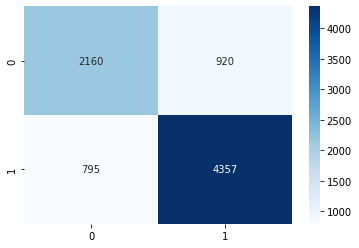


The confusion matrix of : Random Forest



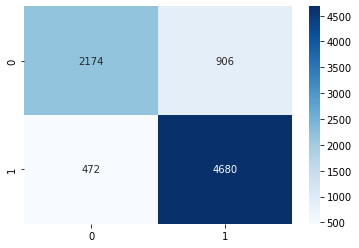


The confusion matrix of : Logistic Regression



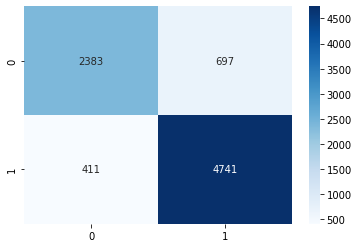


The confusion matrix of : XGBoost



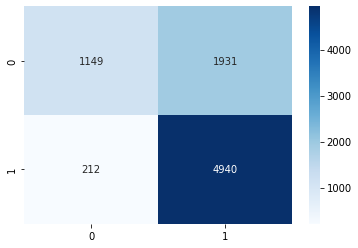


The confusion matrix of : Support Vector Machines



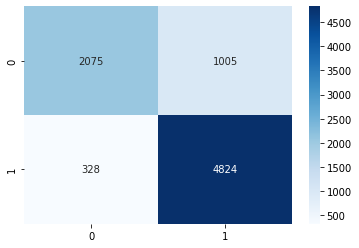

In [ ]:
#Confusion matrix of all binery classification model
y_pred=[NB_prediction,rf_prediction,logreg_prediction,xgb_prediction,svc_prediction]
for i in range(len(y_pred)):
  cm=confusion_matrix(y_test, y_pred[i])
  print(f'\nThe confusion matrix of : {model_list[i]}\n')
  sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
  plt.show()
  
  




### ROC curve for different models

In [ ]:
models = [naiveByes_clf,rf_clf,logreg,xgboost_clf,svc]


ROC curve of : Naive Bayes



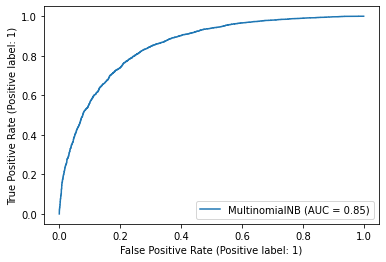


ROC curve of : Random Forest



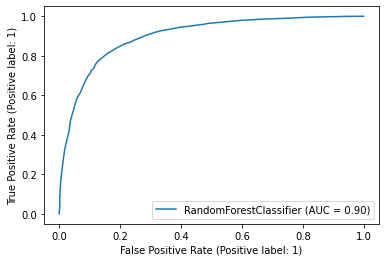


ROC curve of : Logistic Regression



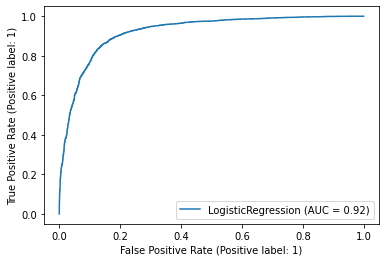


ROC curve of : XGBoost



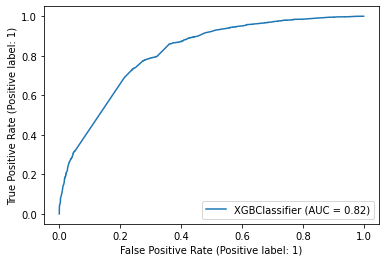


ROC curve of : Support Vector Machines



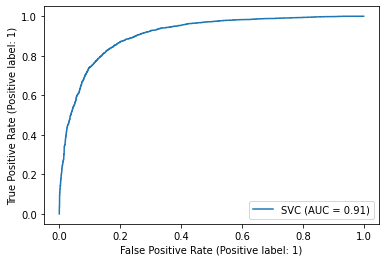

In [ ]:
for i in range(len(models)):
  print(f'\nROC curve of : {model_list[i]}\n')
  metrics.plot_roc_curve(models[i], X_test, y_test)
  plt.show()
  


# Evaluation of all Binary Classification

In [ ]:
model_list = ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
           'XGBoost']

In [ ]:
accuracy_list = [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
             xgb_accuracy]

In [ ]:
models = pd.DataFrame({
    'Model': model_list,
    'Test accuracy': accuracy_list })

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.865403
0,Support Vector Machines,0.838071
2,Random Forest,0.832604
3,Naive Bayes,0.791667
4,XGBoost,0.739674


### Checking the performance of winner model(Logistic Regression) with Tf-Idf

In [ ]:
vectorizer_tf_idf = TfidfVectorizer(stop_words = stop_words,decode_error = 'replace',max_features=30000)
X_train_tf_idf = vectorizer_tf_idf.fit_transform(X_train)
X_test_tf_idf = vectorizer_tf_idf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_tf_idf = LogisticRegression()
Logistic_tf_idf.fit(X_train_tf_idf,y_train)

Train_prediction_tfIdf=Logistic_tf_idf.predict(X_train_tf_idf)
Test_prediction_tfidf =Logistic_tf_idf.predict(X_test_tf_idf)
Train_accurecy_tfidf=accuracy_score(y_train,Train_prediction_tfIdf)
Test_accuracy_tfidf = accuracy_score(y_test,Test_prediction_tfidf)
print("training accuracy Score    : ",Train_accurecy_tfidf)
print("Validation accuracy Score : ",Test_accuracy_tfidf )
print(classification_report(Test_prediction_tfidf,y_test))

training accuracy Score    :  0.8865299924069856
Validation accuracy Score :  0.8454810495626822
              precision    recall  f1-score   support

           0       0.70      0.87      0.77      2474
           1       0.94      0.84      0.88      5758

    accuracy                           0.85      8232
   macro avg       0.82      0.85      0.83      8232
weighted avg       0.86      0.85      0.85      8232



### How was our sentiment analysis?
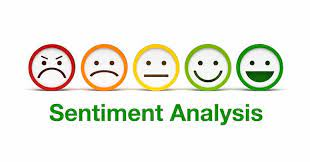



